In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Analyse de la consommation électrique en fonction des conditions météorologiques

In [33]:
from importation_data import conso_annuelle_departements
conso2024 = conso_annuelle_departements[conso_annuelle_departements["Année"]==2024].reset_index()
conso2024 = conso2024[['Code département','Consommation résidentiel (MWh)']]
conso2024 = conso2024.sort_values(by='Code département')
conso2024 = conso2024[~conso2024['Code département'].isin(['971','972','973','974','976'])]
conso2024.rename(columns={'Code département':'dep'},inplace=True)
population_dept = pd.read_excel("../POPULATION_MUNICIPALE_DEPARTEMENT_FRANCE.xlsx")
population_dept = population_dept[['dep','p21_pop']]
conso2024 = pd.merge(conso2024,population_dept,on='dep',how='inner')
conso2024['Consommation résidentiel (MWh)'] = conso2024["Consommation résidentiel (MWh)"]/conso2024['p21_pop']


In [4]:
from importation_meteo import meteo_departementale2024
tempmoy2024 = meteo_departementale2024.groupby('Code INSEE département')['TMoy (°C)'].mean().reset_index()

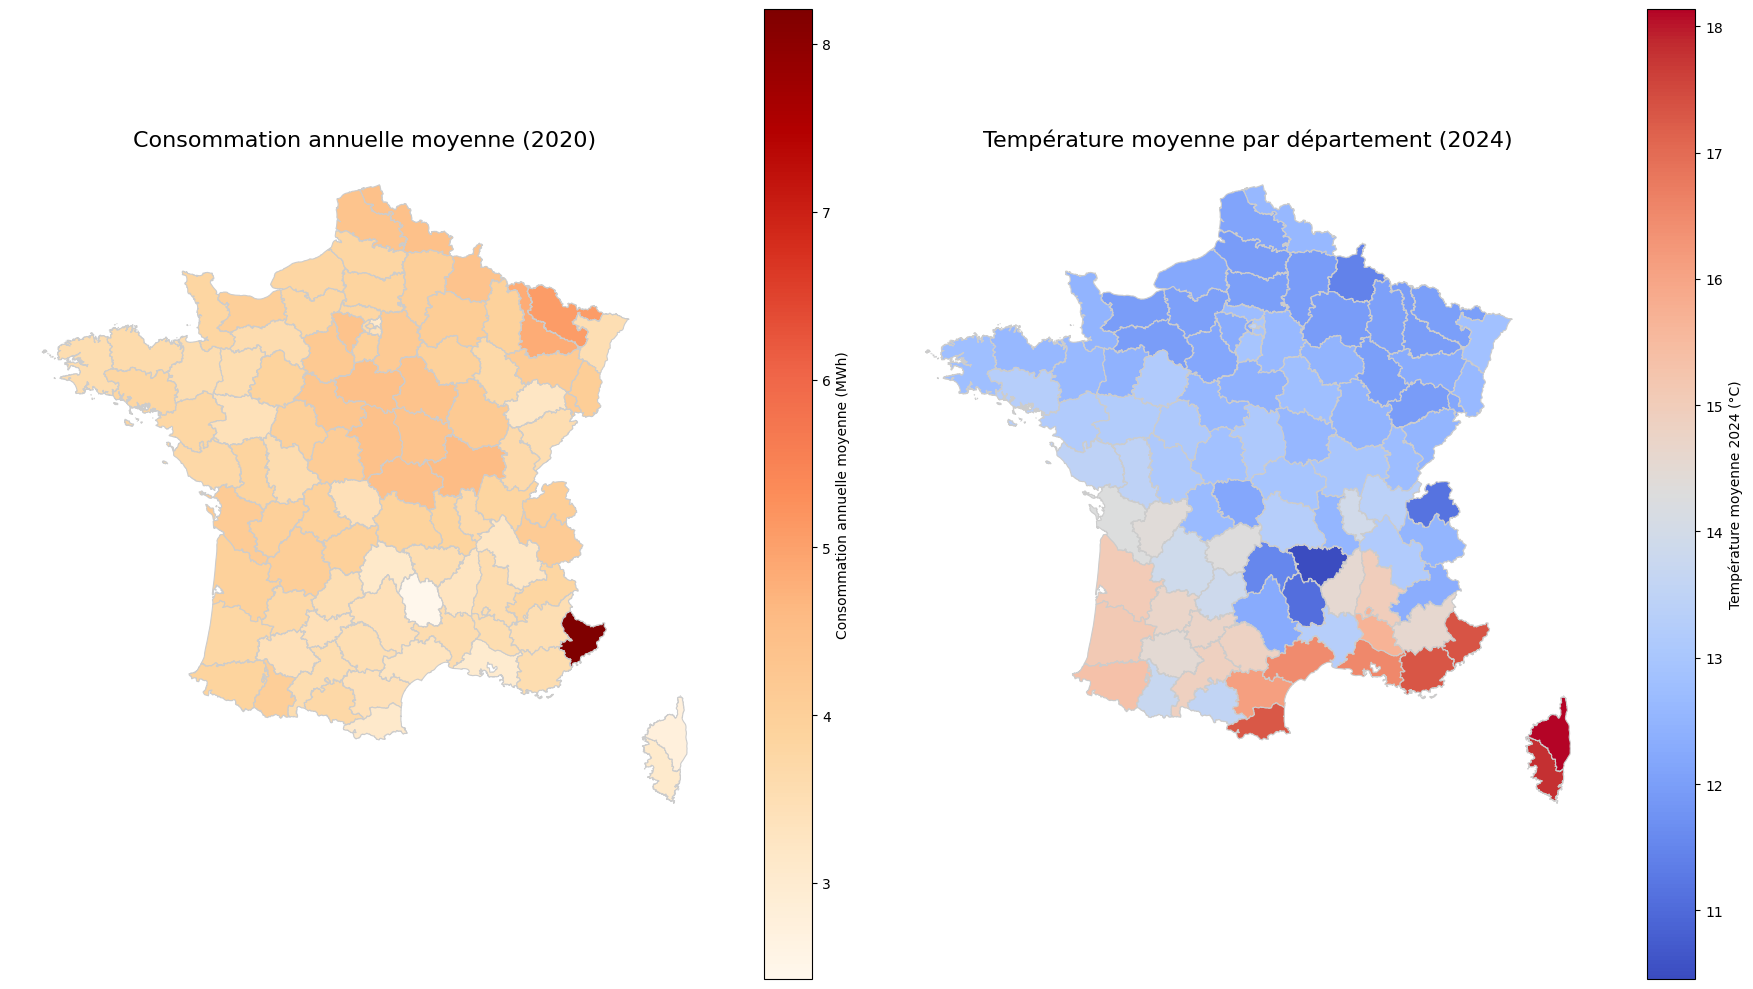

In [34]:
gdf = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson")
conso = gdf.merge(conso2024, left_on='code', right_on='dep', how='left')
temp = gdf.merge(tempmoy2024, left_on='code', right_on='Code INSEE département', how='left')
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

conso.plot(
    column='Consommation résidentiel (MWh)',
    cmap='OrRd',
    linewidth=0.8,
    ax=axes[0],
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Consommation annuelle moyenne (MWh)", 'orientation': "vertical"}
)
axes[0].set_title('Consommation annuelle moyenne (2020)', fontsize=16)
axes[0].set_axis_off()

temp.plot(
    column='TMoy (°C)',
    cmap='coolwarm',
    linewidth=0.8,
    ax=axes[1],
    edgecolor='0.8',
    legend=True,
    legend_kwds={'label': "Température moyenne 2024 (°C)", 'orientation': "vertical"}
)
axes[1].set_title('Température moyenne par département (2024)', fontsize=16)
axes[1].set_axis_off()

plt.tight_layout()
plt.show()
